# <u>CREDIT CARD DEFAULTER PREDICTION</u>

## *Problem Statement :*

For the given dataset about credit card clients, predict whether a given client will default or not.

## *Dataset Information :*

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [2]:
df = pd.read_csv(r"C:\Users\swapn\Desktop\All Projects\Credit-Card-Defaulter-Prediction\UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

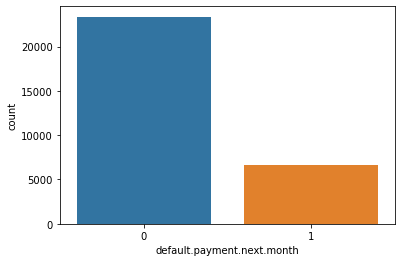

In [4]:
sb.countplot(df['default.payment.next.month'])

<AxesSubplot:xlabel='SEX', ylabel='count'>

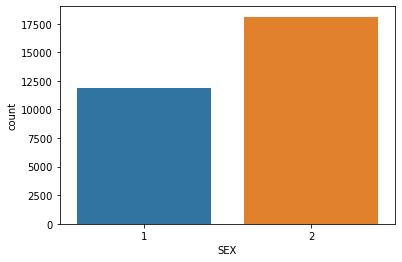

In [16]:
sb.countplot(df['SEX'])

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

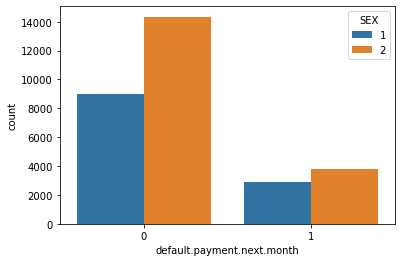

In [19]:
sb.countplot(df['default.payment.next.month'],hue=df['SEX'])

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

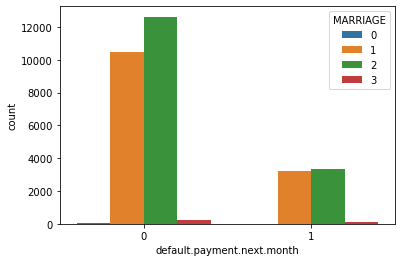

In [20]:
sb.countplot(df['default.payment.next.month'],hue=df['MARRIAGE'])

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

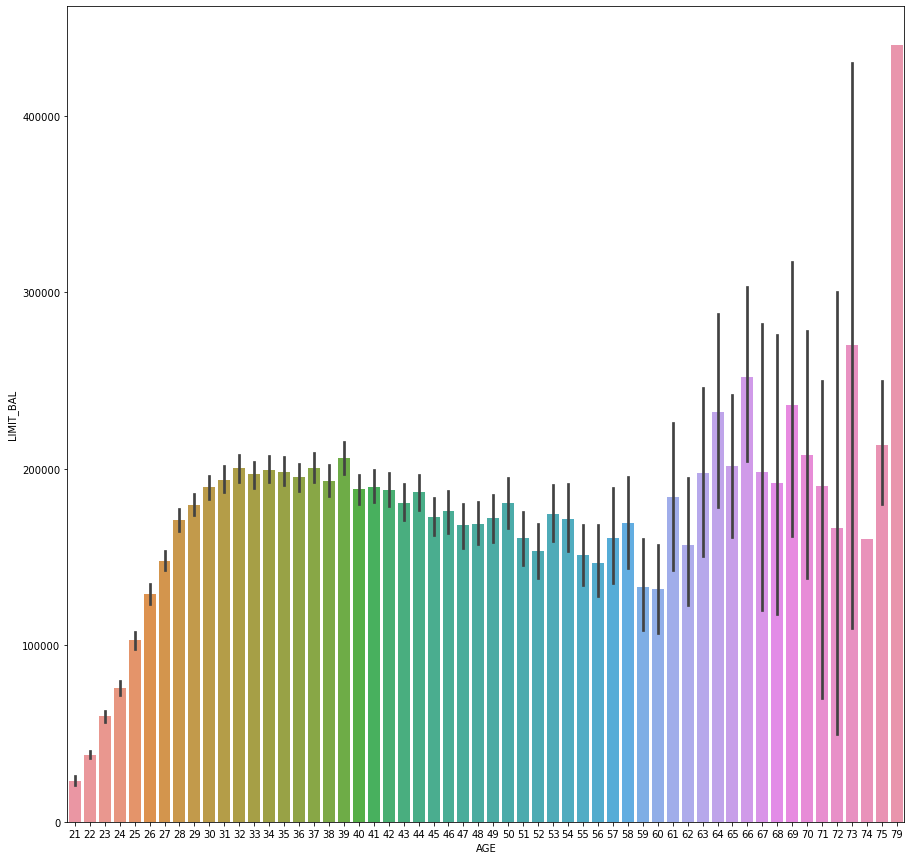

In [25]:
fig,ax = plt.subplots()
fig.set_size_inches(15,15)
sb.barplot(df['AGE'],df['LIMIT_BAL'])

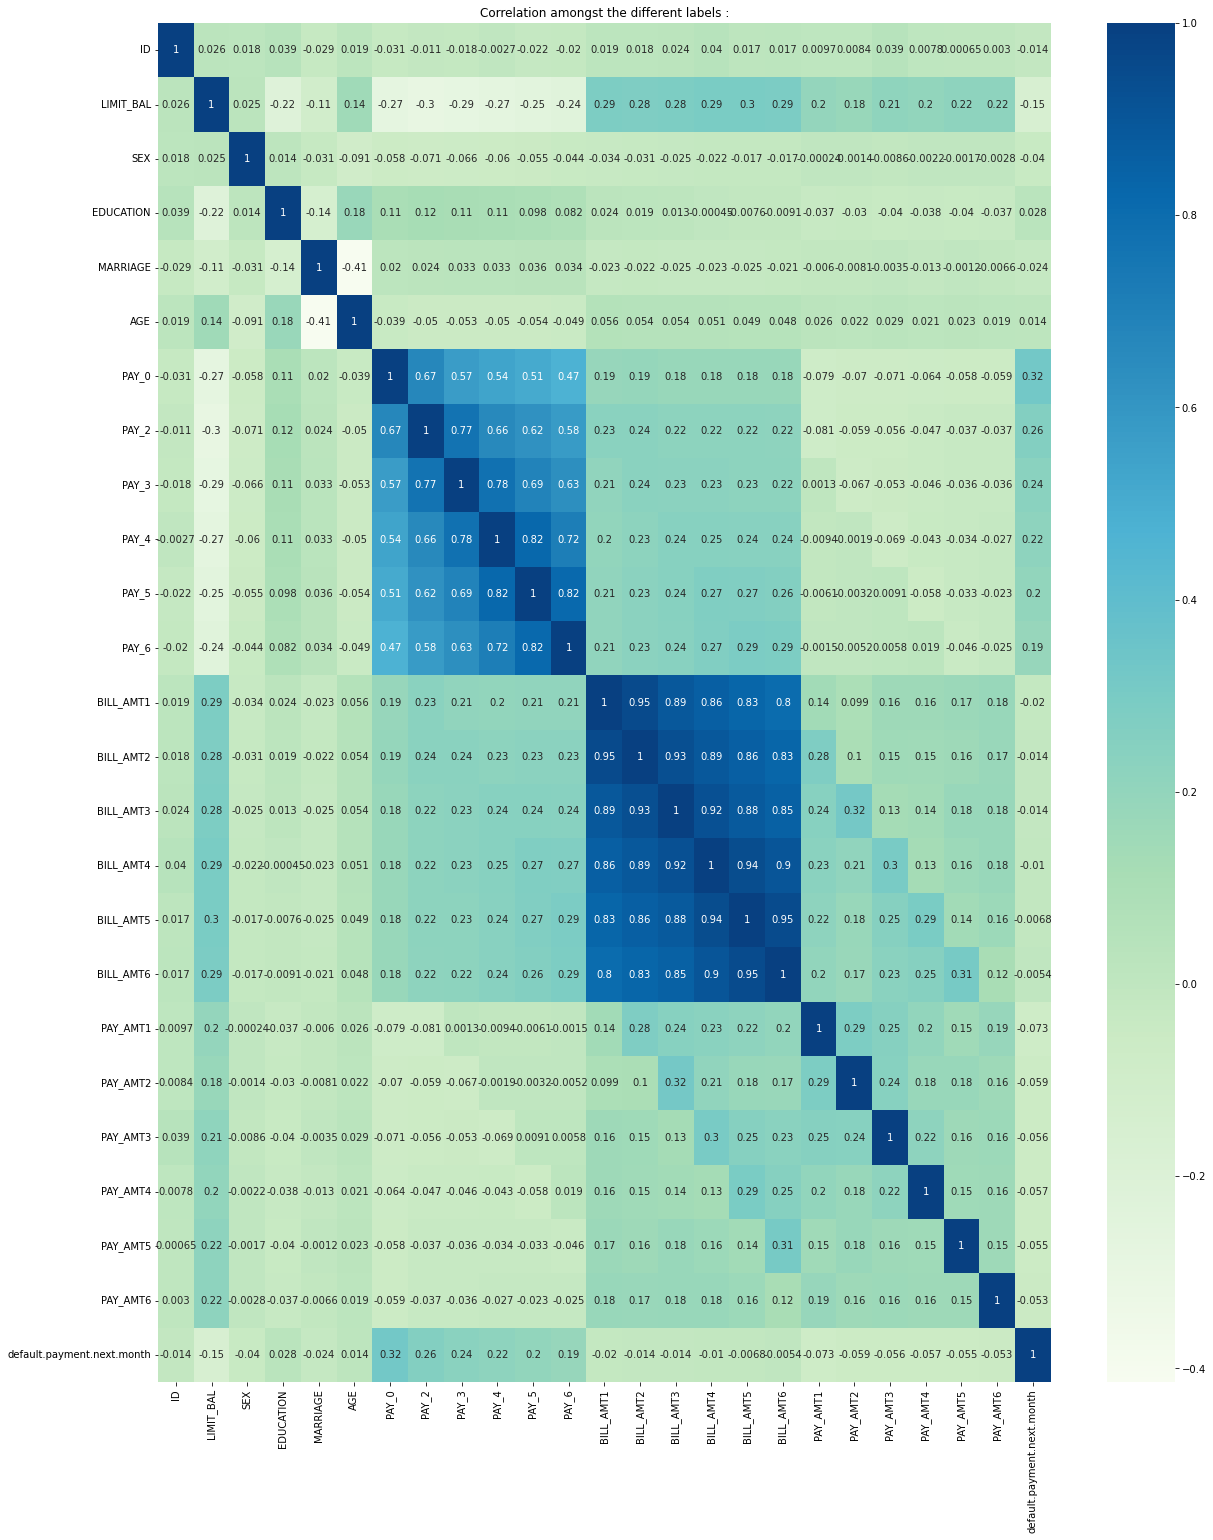

In [7]:
corr=df.corr()
plt.figure(figsize=(20,25))
sb.heatmap(df.corr(),annot=True,cmap="GnBu")
plt.title("Correlation amongst the different labels :")
plt.show()

In [27]:
X=df.drop('default.payment.next.month',axis=1)
Y=df['default.payment.next.month']

<AxesSubplot:title={'center':'Correlation with response variable'}>

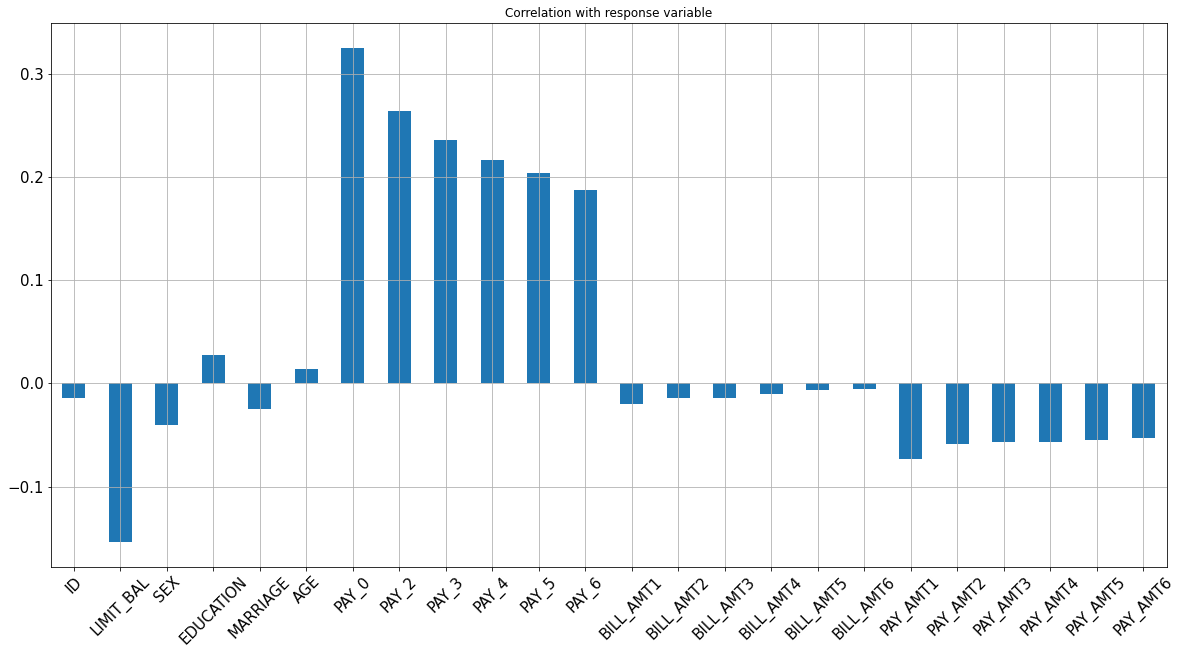

In [28]:
X.corrwith(Y).plot.bar(figsize=(20,10),title="Correlation with response variable",fontsize=15,rot=45,grid=True)

In [29]:
X_new=X.drop(['ID','MARRIAGE','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'],axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X_new=sc.fit_transform(X_new)

In [31]:
Y=np.array(Y)


In [32]:
X.shape,Y.shape

((30000, 24), (30000,))

In [33]:
x=X[:1000,]
y=Y[:1000,]

In [34]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y, test_size= 0.3)

In [49]:
models = {
    LogisticRegression():"Logistic Regression",
    SVC():"Support Vector Machine",
    }

for model in models.keys():
    model.fit(x_train, y_train)

In [50]:
print("Model accuracy are as follows :")
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

Model accuracy are as follows :
Logistic Regression: 81.16%
Support Vector Machine: 82.22%
